In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
(x_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


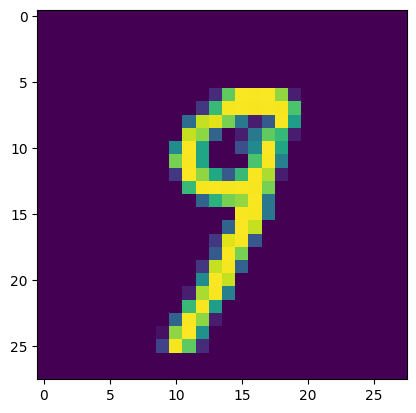

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[43])

In [19]:
x_train = x_train/255
X_test = X_test/255

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\SUJAL\anaconda3\envs\mllearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


In [27]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6891 - loss: 1.0262 - val_accuracy: 0.8349 - val_loss: 0.5555
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8490 - loss: 0.5023 - val_accuracy: 0.8803 - val_loss: 0.4173
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.4087 - val_accuracy: 0.8928 - val_loss: 0.3693
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8969 - loss: 0.3566 - val_accuracy: 0.9079 - val_loss: 0.3170
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9066 - loss: 0.3241 - val_accuracy: 0.9143 - val_loss: 0.2956
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9128 - loss: 0.3013 - val_accuracy: 0.9191 - val_loss: 0.2794
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9194 - loss: 0.2820 - val_accuracy: 0.9237 - val_loss: 0.2592
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9232 - loss: 0.2660 - 

In [29]:
y_prob = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


In [31]:
y_prob[43]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
y_pred = y_prob.argmax(axis=1)


In [39]:
from sklearn.metrics import accuracy_score


In [41]:
accuracy_score(y_test,y_pred)


0.9456

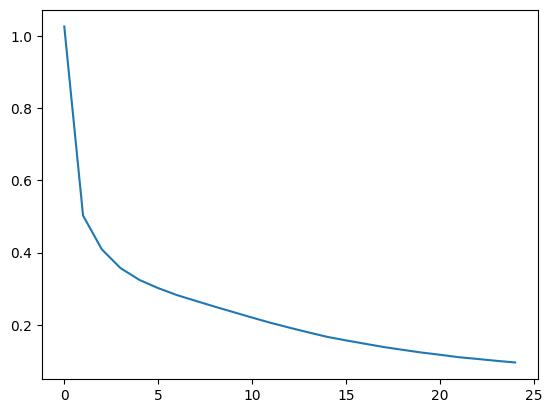

In [45]:
plt.plot(history.history['loss'])


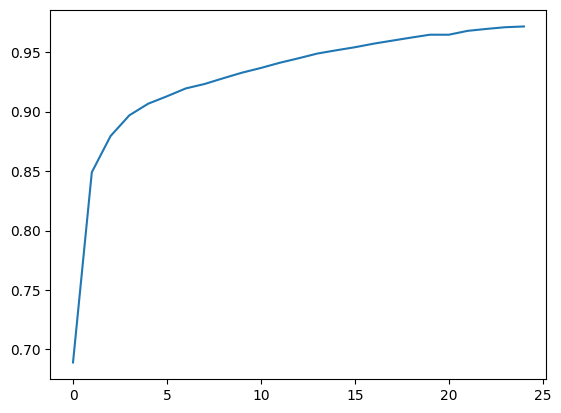

In [47]:
plt.plot(history.history['accuracy'])


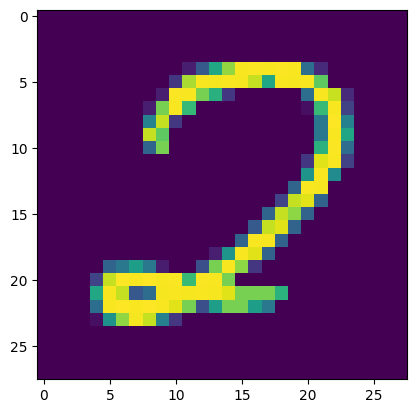

In [53]:
plt.imshow(X_test[421])

In [57]:
model.predict(X_test[644].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([0], dtype=int64)